## **IMPORTES**

In [117]:
# Data Handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
train = pd.read_csv(filepath_or_buffer="../data/train_process.csv")
test = pd.read_csv(filepath_or_buffer="../data/test_process.csv")

## **PRÉ-PROCESSAMENTO**

In [119]:
polynomial = PolynomialFeatures(degree=2)
polynomial.fit(X=train.drop(columns=['target_deathrate']), y=train['target_deathrate'])

PolynomialFeatures()

### FEATURE ENGINEERING

In [120]:
X_train = polynomial.transform(X=train.drop(columns=['target_deathrate']))
y_train = train['target_deathrate']

X_test = polynomial.transform(X=test.drop(columns=['target_deathrate']))
y_test = test['target_deathrate']

In [121]:
print(X_train.shape)
print(X_test.shape)

(2415, 496)
(604, 496)


### REDUÇÃO DE DIMENSIONALIDADE

In [122]:
pca = PCA(n_components=2)
pca.fit(X=X_train, y=y_train)

PCA(n_components=2)

In [123]:
X_train = pca.transform(X=X_train)
X_test = pca.transform(X=X_test)

In [124]:
print(X_train.shape)
print(X_test.shape)

(2415, 2)
(604, 2)


## **TREINAMENTO**

In [125]:
reg_polinomial = LinearRegression(fit_intercept=True, n_jobs=-1)
reg_polinomial = reg_polinomial.fit(X=X_train, y=y_train)

In [126]:
display(reg_polinomial.coef_)
display(reg_polinomial.intercept_)

array([-1.50323035e-04, -5.02999972e-05])

np.float64(5.177552306152033)

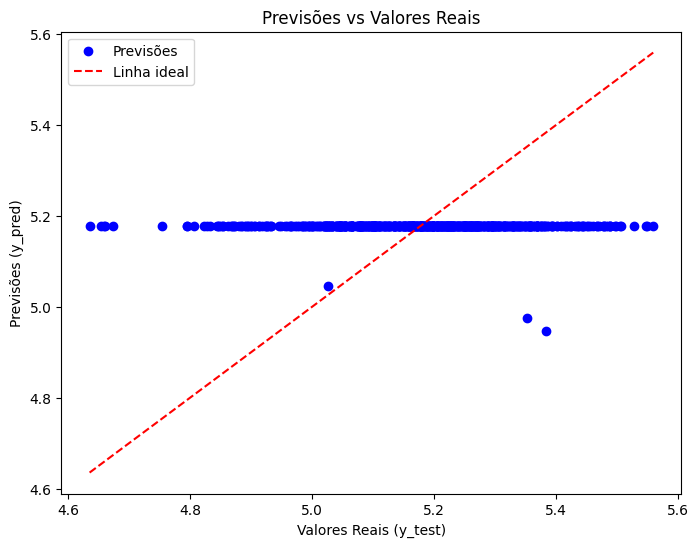

In [127]:
y_pred = reg_polinomial.predict(X=X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha ideal')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões (y_pred)')
plt.legend()
plt.show()

## **VALIDAÇÃO**
- Resultado não interessante. A complexidade adicionada ao processamento de dados, utilizando o método de PolynomialFeature aumentou exponencialmente a dimensionalidade do dataset. Mostrando a necessidade de uma redução de dimensionalidade, em que aplicamos um PCA com 2 componentes.
- No teste empírico de n° de componentes, no PCA, percebeu-se que ao aumentar o n° de componentes, pior o resultado do modelo. E quanto menor, melhor o aprendizado.

In [128]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): -0.01635110538569573


In [129]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.02464039163988743
